In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
#df = pd.read_csv('one_client_1.csv')
#df = pd.read_csv('two_clients_6.csv')
df = pd.read_csv('send_time_2.csv')
#df = df.loc[df['time'] < 10000]

In [27]:
latency = df['time']
latency.describe()

count    100000.000000
mean        325.748670
std          53.038967
min         255.000000
25%         277.000000
50%         341.000000
75%         346.000000
max        1276.000000
Name: time, dtype: float64

In [28]:
latency.quantile([0.9, 0.99, 0.999, 0.9999])

0.9000    412.0
0.9900    514.0
0.9990    620.0
0.9999    669.0
Name: time, dtype: float64

<Axes: >

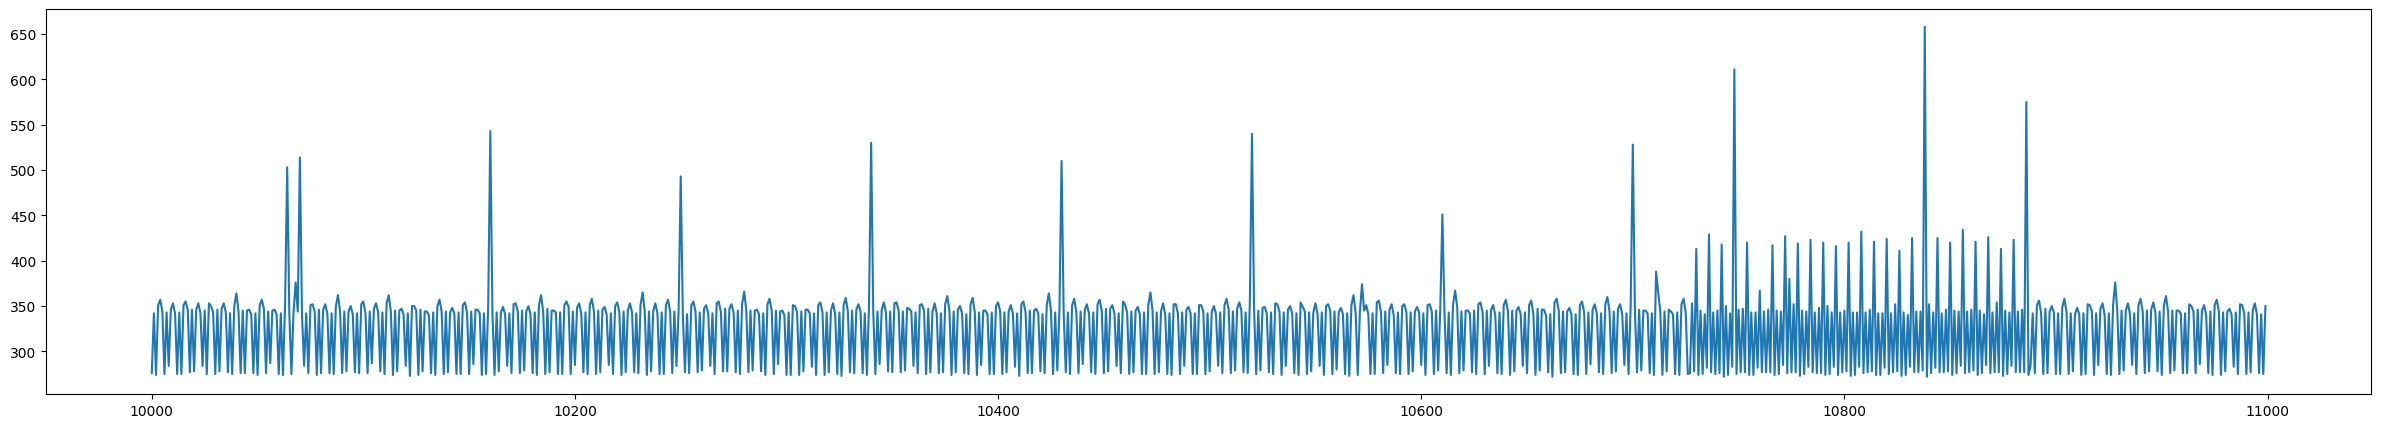

In [29]:
start = 10000
end = start + 1000
latency.iloc[start:end].plot(figsize=(30,5))

Text(519.0, 29532.824999999997, '99%: 514.00')

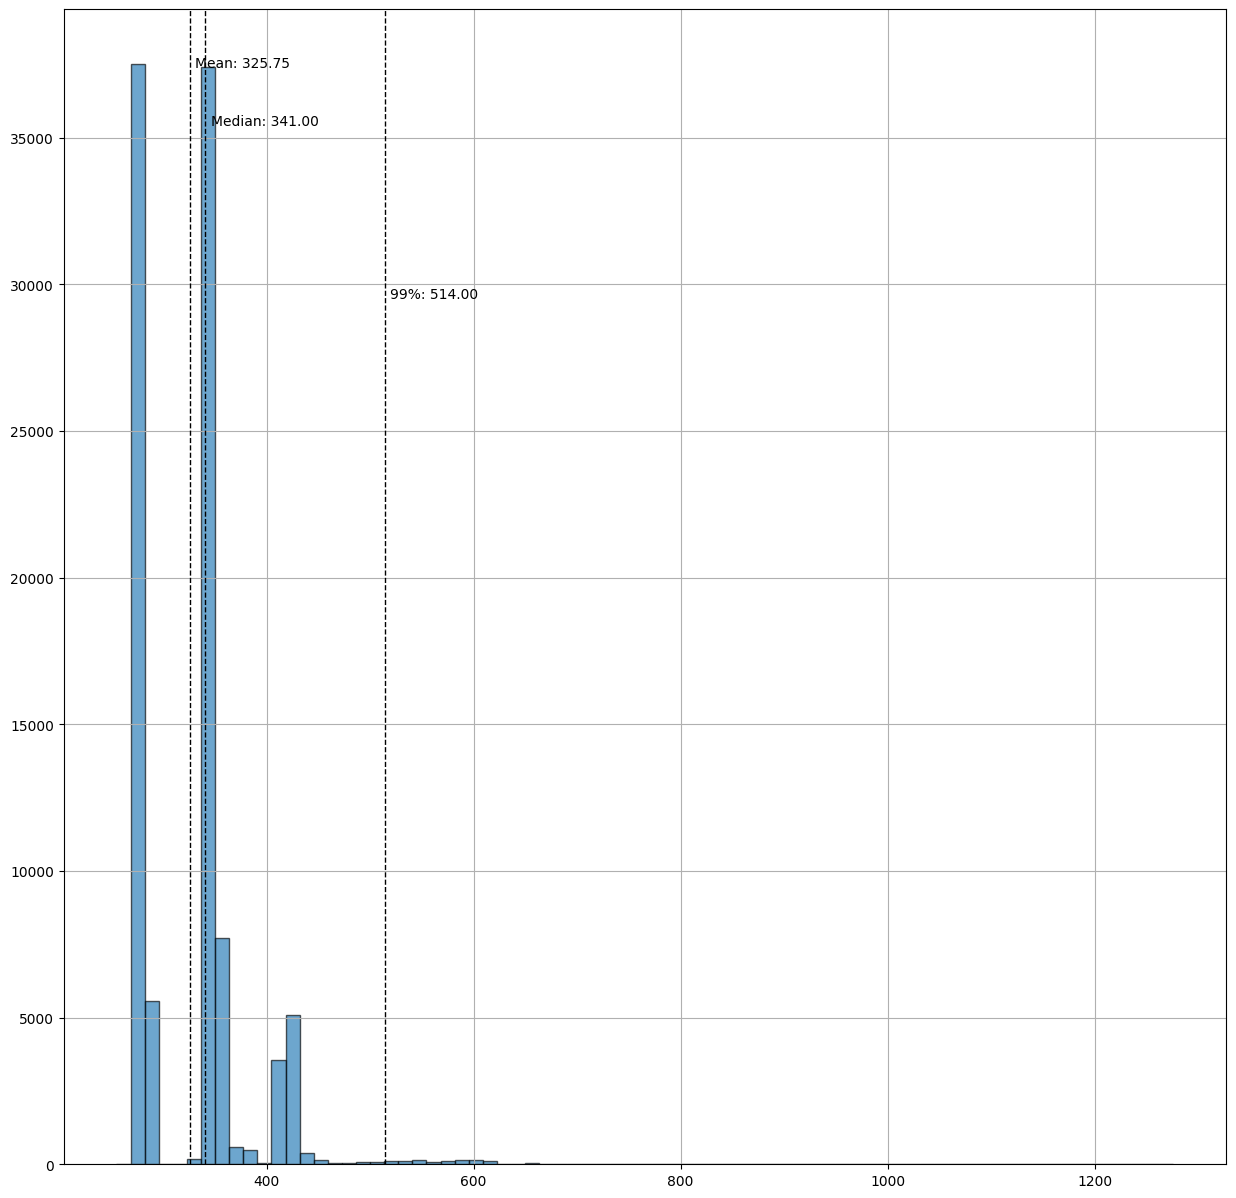

In [30]:
latency.clip(0,10000).hist(bins=75, figsize=(15,15), edgecolor='k', alpha=0.65)
plt.axvline(latency.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(latency.median(), color='k', linestyle='dashed', linewidth=1)
y_min, y_max = plt.ylim()
plt.text(latency.median() + 5, y_max*0.9, 'Median: {:.2f}'.format(latency.median()))
plt.text(latency.mean() + 5, y_max*0.95, 'Mean: {:.2f}'.format(latency.mean()))
percentiles=latency.quantile([0.9, 0.99, 0.999, 0.9999])

plt.axvline(percentiles.iloc[1], color='k', linestyle='dashed', linewidth=1)
plt.text(percentiles.iloc[1] + 5, y_max*0.75, '99%: {:.2f}'.format(percentiles.iloc[1]))